In [1]:
!nvidia-smi

Mon Apr  8 10:08:30 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   39C    P8              7W /  280W |     367MiB /   8192MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
from transformers import RobertaModel, RobertaTokenizer, RobertaConfig
model_type = 'roberta-base'
config = RobertaConfig.from_pretrained(model_type)
config.output_attentions = True
model = RobertaModel.from_pretrained(model_type, config=config).to('cuda')
tokenizer = RobertaTokenizer.from_pretrained(model_type)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
# There is a time-series dataset. We will explain the domain and statistics of this dataset, and discuss the instruction that will be performed on it. Below is the information about the input time-series:
# [Domain]: This dataset is a collection of solar energy power generation data, gathered every 10 minutes from 106 photovoltaic plants in Illinois, USA, in 2006. Among these, the dataset represents solar energy power generation from one distributed photovoltaic plant (DPV) in Illinois, USA. Specifically, it is located at a latitude of 42.45 degrees and a longitude of -88.45 degrees. This DPV has a fixed tilt equal to its latitude and has been processed through a low-pass filter. Moreover, the high-frequency variability has been smoothed out more significantly. The installed capacity of this photovoltaic plant is 29MW.
# [Statistics]: The input data has a minimum value of 0.0, a maximum value of 24.6, and a median value of 0.0.
# [Instruction]: Predict the next 24 steps given the previous 168 steps information attached.

In [3]:
text = "There is a time-series dataset. We will explain the domain and statistics of this dataset, and discuss the instruction that will be performed on it. Below is the information about the input time-series: [Domain]: This dataset is a collection of solar energy power generation data, gathered every 10 minutes from 106 photovoltaic plants in Illinois, USA, in 2006. Among these, the dataset represents solar energy power generation from one distributed photovoltaic plant (DPV) in Illinois, USA. Specifically, it is located at a latitude of 42.45 degrees and a longitude of -88.45 degrees. This DPV has a fixed tilt equal to its latitude and has been processed through a low-pass filter. Moreover, the high-frequency variability has been smoothed out more significantly. The installed capacity of this photovoltaic plant is 29MW. [Statistics]: The input data has a minimum value of 0.0, a maximum value of 24.6, and a median value of 0.0. [Instruction]: Predict the next 24 steps given the previous 168 steps information attached."

NameError: name 'np' is not defined

In [7]:
tok = tokenizer.tokenize(text)
p_pos = len(tok) # position for token
# tok = tok1+tok2
# tok,p_pos, tok[p_pos]

In [8]:
print(tok)
print(p_pos)
print(len(tok))
print(p_pos)

['ĠThere', 'Ġis', 'Ġa', 'Ġtime', '-', 'series', 'Ġdataset', '.', 'ĠWe', 'Ġwill', 'Ġexplain', 'Ġthe', 'Ġdomain', 'Ġand', 'Ġstatistics', 'Ġof', 'Ġthis', 'Ġdataset', ',', 'Ġand', 'Ġdiscuss', 'Ġthe', 'Ġinstruction', 'Ġthat', 'Ġwill', 'Ġbe', 'Ġperformed', 'Ġon', 'Ġit', '.', 'ĠBelow', 'Ġis', 'Ġthe', 'Ġinformation', 'Ġabout', 'Ġthe', 'Ġinput', 'Ġtime', '-', 'series', ':', 'Ġ[', 'Domain', ']:', 'ĠThis', 'Ġdataset', 'Ġis', 'Ġa', 'Ġcollection', 'Ġof', 'Ġsolar', 'Ġenergy', 'Ġpower', 'Ġgeneration', 'Ġdata', ',', 'Ġgathered', 'Ġevery', 'Ġ10', 'Ġminutes', 'Ġfrom', 'Ġ106', 'Ġphot', 'ov', 'olt', 'aic', 'Ġplants', 'Ġin', 'ĠIllinois', ',', 'ĠUSA', ',', 'Ġin', 'Ġ2006', '.', 'ĠAmong', 'Ġthese', ',', 'Ġthe', 'Ġdataset', 'Ġrepresents', 'Ġsolar', 'Ġenergy', 'Ġpower', 'Ġgeneration', 'Ġfrom', 'Ġone', 'Ġdistributed', 'Ġphot', 'ov', 'olt', 'aic', 'Ġplant', 'Ġ(', 'DP', 'V', ')', 'Ġin', 'ĠIllinois', ',', 'ĠUSA', '.', 'ĠSpecifically', ',', 'Ġit', 'Ġis', 'Ġlocated', 'Ġat', 'Ġa', 'Ġlatitude', 'Ġof', 'Ġ42', '.', '45',

In [11]:
for i in range(len(tok)):
    if tok[i][0] == 'Ġ':
        tok[i] = tok[i][1:]

In [12]:
print(tok)
print(p_pos)
print(len(tok))
print(p_pos)

['There', 'is', 'a', 'time', '-', 'series', 'dataset', '.', 'We', 'will', 'explain', 'the', 'domain', 'and', 'statistics', 'of', 'this', 'dataset', ',', 'and', 'discuss', 'the', 'instruction', 'that', 'will', 'be', 'performed', 'on', 'it', '.', 'Below', 'is', 'the', 'information', 'about', 'the', 'input', 'time', '-', 'series', ':', '[', 'Domain', ']:', 'This', 'dataset', 'is', 'a', 'collection', 'of', 'solar', 'energy', 'power', 'generation', 'data', ',', 'gathered', 'every', '10', 'minutes', 'from', '106', 'phot', 'ov', 'olt', 'aic', 'plants', 'in', 'Illinois', ',', 'USA', ',', 'in', '2006', '.', 'Among', 'these', ',', 'the', 'dataset', 'represents', 'solar', 'energy', 'power', 'generation', 'from', 'one', 'distributed', 'phot', 'ov', 'olt', 'aic', 'plant', '(', 'DP', 'V', ')', 'in', 'Illinois', ',', 'USA', '.', 'Specifically', ',', 'it', 'is', 'located', 'at', 'a', 'latitude', 'of', '42', '.', '45', 'degrees', 'and', 'a', 'long', 'itude', 'of', '-', '88', '.', '45', 'degrees', '.', 

In [9]:
print(tok[p_pos-1])

.


In [13]:
ids = torch.tensor(tokenizer.convert_tokens_to_ids(tok)).unsqueeze(0).to('cuda')
with torch.no_grad():
    output = model(ids)
attentions = torch.cat(output[2]).to('cpu')
attentions.shape #(layer, batch_size (squeezed by torch.cat), num_heads, sequence_length, sequence_length)

A sequence with no special tokens has been passed to the RoBERTa model. This model requires special tokens in order to work. Please specify add_special_tokens=True in your encoding.


torch.Size([12, 12, 226, 226])

In [14]:
# A sequence with no special tokens has been passed to the RoBERTa model. This model requires special tokens in order to work. Please specify add_special_tokens=True in your encoding

In [15]:
attentions = attentions.permute(2,1,0,3)
print(attentions.shape) #(sequence_length, num_heads, layer, sequence_length)

torch.Size([226, 12, 12, 226])


In [16]:
layers = len(attentions[0][0])
heads = len(attentions[0])
seqlen = len(attentions)
layers,heads,seqlen

(12, 12, 226)

In [17]:
attentions_pos = attentions[p_pos-1]
attentions_pos.shape

torch.Size([12, 12, 226])

Attention weights for token .


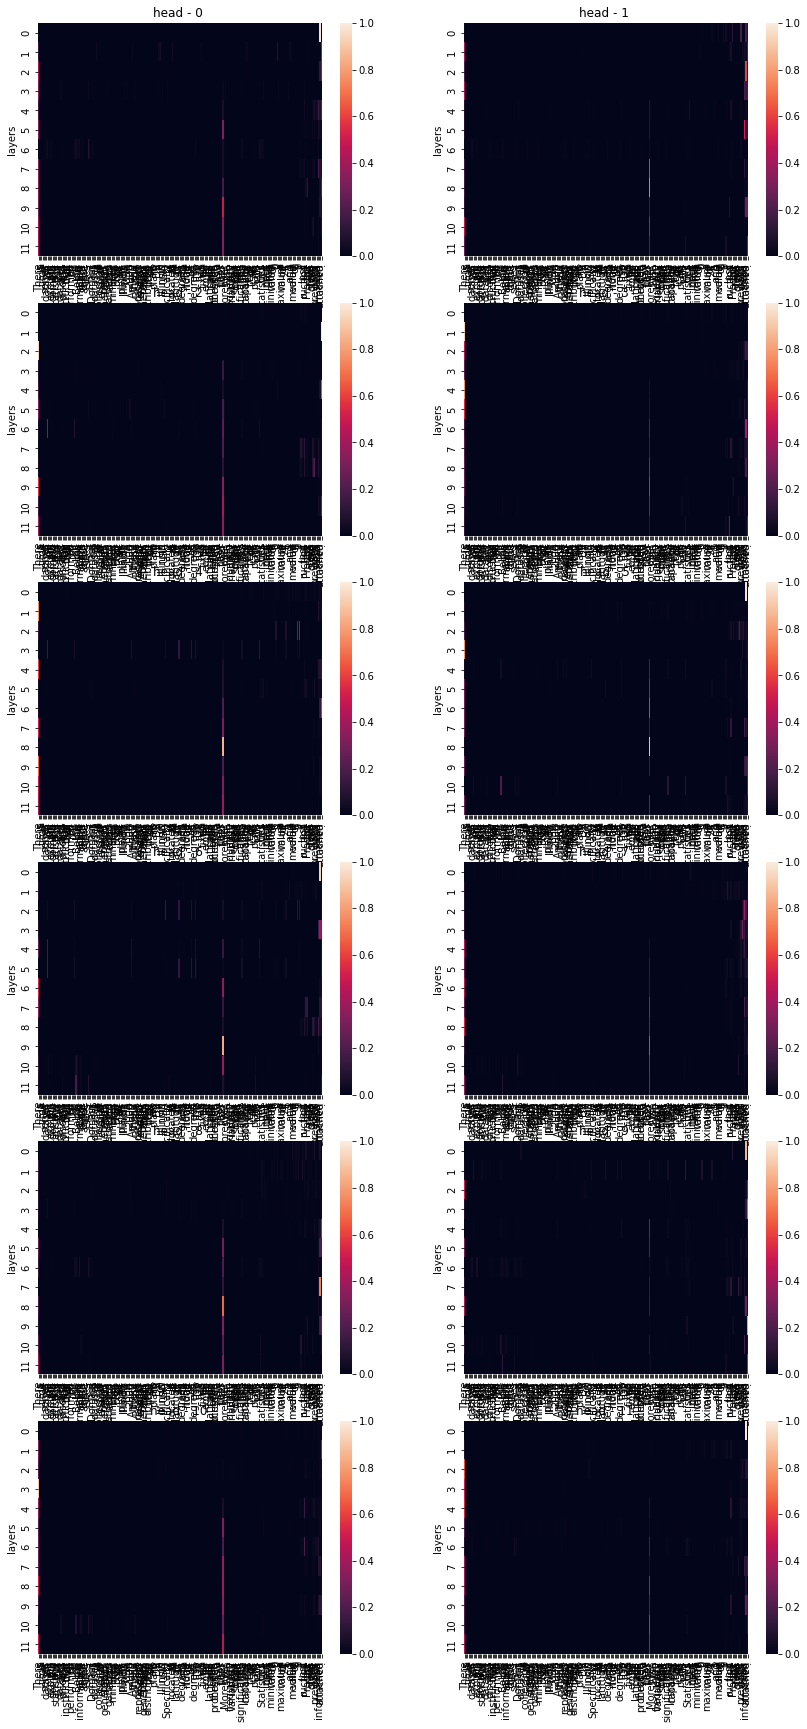

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cols = 2
rows = int(heads/cols)

fig, axes = plt.subplots( rows,cols, figsize = (14,30))
axes = axes.flat
print (f'Attention weights for token {tok[p_pos-1]}')
for i,att in enumerate(attentions_pos):

    #im = axes[i].imshow(att, cmap='gray')
    sns.heatmap(att,vmin = 0, vmax = 1,ax = axes[i], xticklabels = tok)
    axes[i].set_title(f'head - {i} ' )
    axes[i].set_ylabel('layers')

<AxesSubplot:>

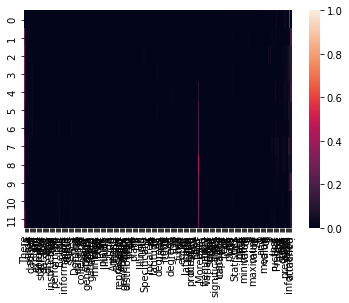

In [19]:
avg_attention = attentions_pos.mean(dim = 0)
sns.heatmap(avg_attention,vmin = 0, vmax = 1, xticklabels= tok, )

<AxesSubplot:>

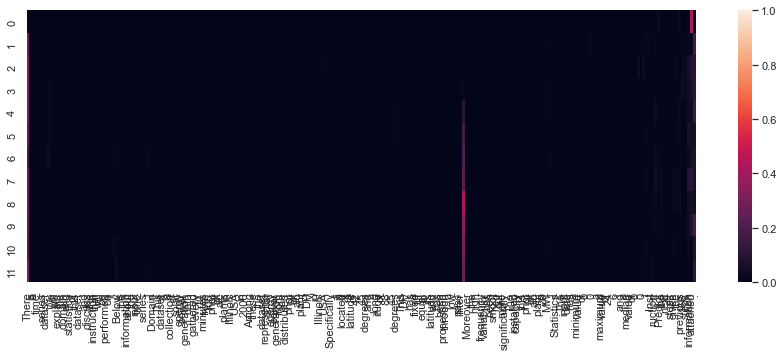

In [20]:
avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention,vmin = 0, vmax = 1, xticklabels= tok, )

In [21]:
import torch
import torch.nn.functional as F

avg_attention_norm = F.normalize(avg_attention, p=2, dim=1)
# print(avg_attention_norm)

<AxesSubplot:>

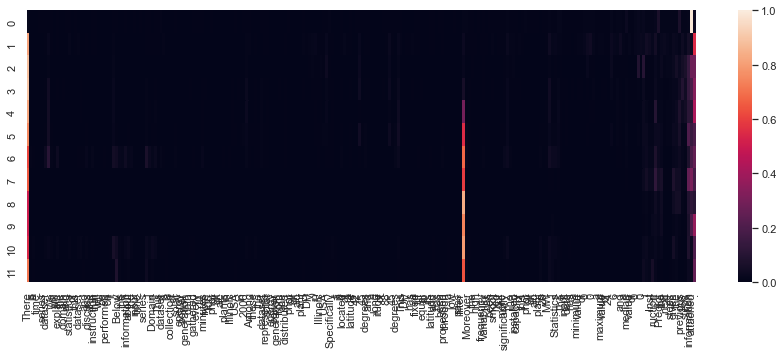

In [22]:
# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_norm,vmin = 0, vmax = 1, xticklabels= tok, )

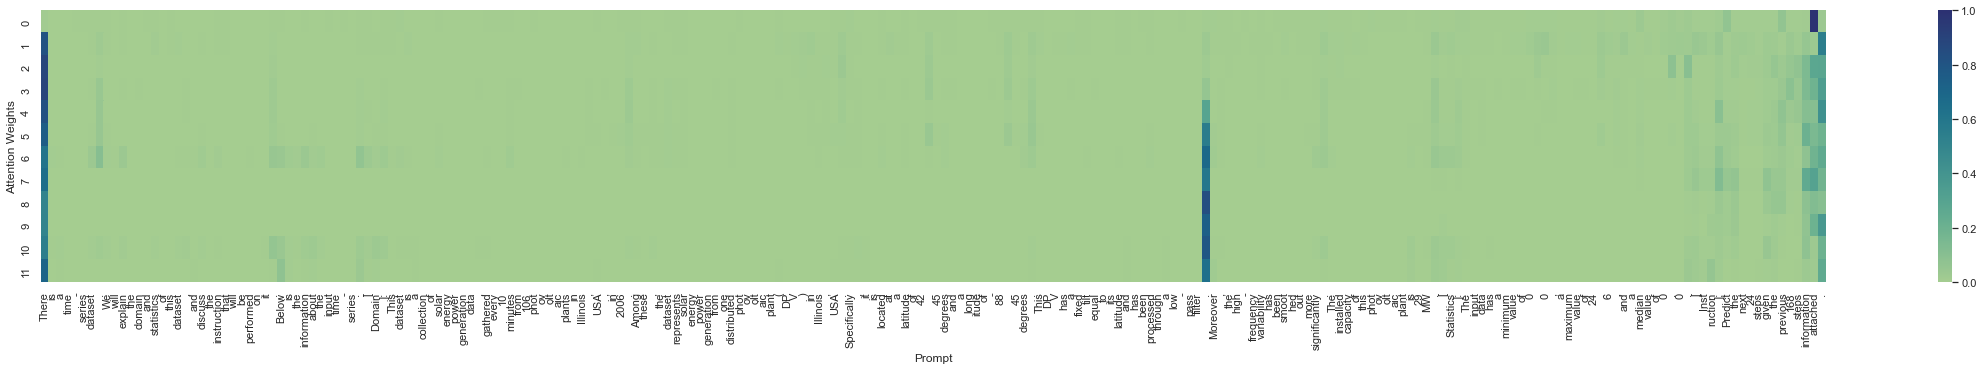

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (40, 5)})
sns.heatmap(avg_attention_norm,vmin = 0, vmax = 1, xticklabels= tok, cmap='crest',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Attention Weights')

# 변경 사항을 적용하여 그래프 표시
plt.show()

In [29]:
print(len(tok))
print(tok[:41])

226
['There', 'is', 'a', 'time', '-', 'series', 'dataset', '.', 'We', 'will', 'explain', 'the', 'domain', 'and', 'statistics', 'of', 'this', 'dataset', ',', 'and', 'discuss', 'the', 'instruction', 'that', 'will', 'be', 'performed', 'on', 'it', '.', 'Below', 'is', 'the', 'information', 'about', 'the', 'input', 'time', '-', 'series', ':']


In [37]:
print(avg_attention_norm.shape)

torch.Size([12, 226])


In [38]:
avg_attention_norm_0_41 = avg_attention_norm[:, :41]
tok_0_41 = tok[:41]

print(avg_attention_norm_0_41.shape)
print(len(tok_0_41))

torch.Size([12, 41])
41


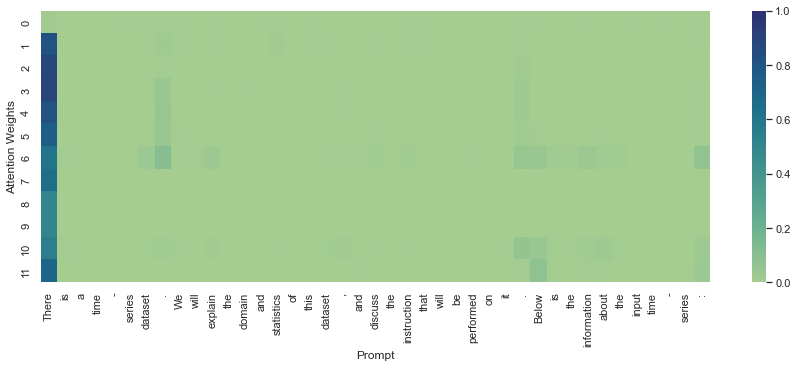

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_norm_0_41,vmin = 0, vmax = 1, xticklabels= tok_0_41, cmap='crest',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Attention Weights')

# 변경 사항을 적용하여 그래프 표시
plt.show()

In [41]:
print(226 / 4)

56.5


In [42]:
print(56)
print(56*2)
print(56*3)
print(56*4)

56
112
168
224


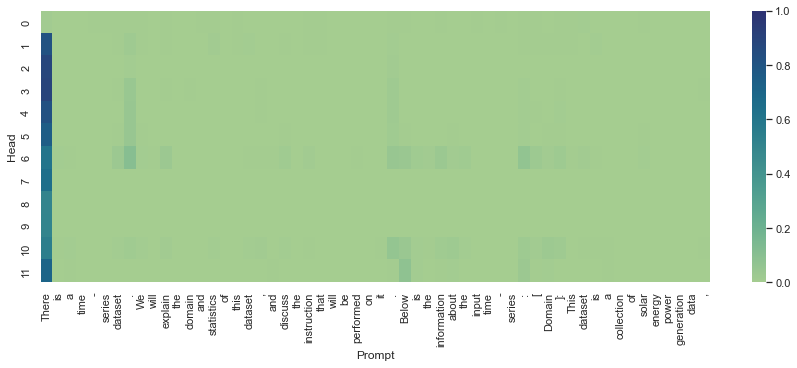

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_norm[:, :56],vmin = 0, vmax = 1, xticklabels= tok[:56], cmap='crest',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Head')

# 변경 사항을 적용하여 그래프 표시
plt.show()

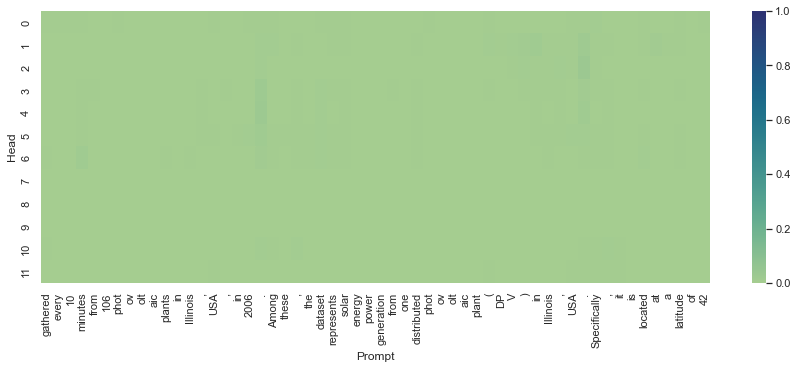

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_norm[:, 56:56*2],vmin = 0, vmax = 1, xticklabels= tok[56:56*2], cmap='crest',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Head')

# 변경 사항을 적용하여 그래프 표시
plt.show()

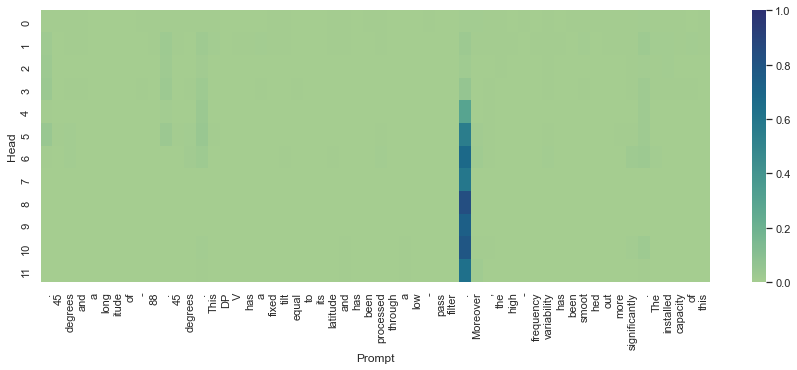

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_norm[:, 56*2:56*3],vmin = 0, vmax = 1, xticklabels= tok[56*2:56*3], cmap='crest',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Head')

# 변경 사항을 적용하여 그래프 표시
plt.show()

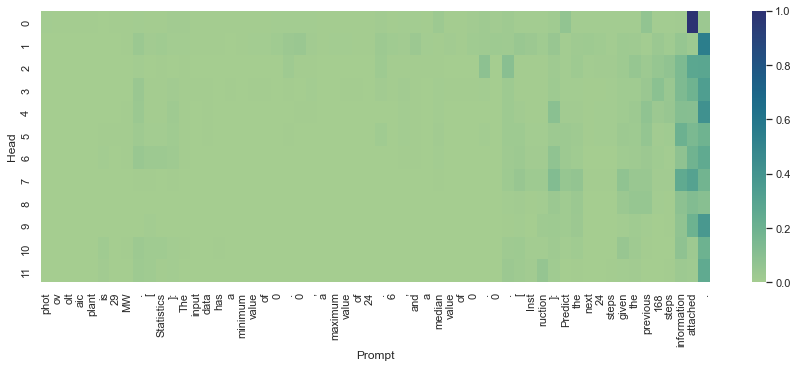

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_norm[:, 56*3:],vmin = 0, vmax = 1, xticklabels= tok[56*3:], cmap='crest',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Head')

# 변경 사항을 적용하여 그래프 표시
plt.show()

### Norm 관련

In [ ]:
# import torch
# import torch.nn.functional as F

# avg_attention_norm = F.normalize(avg_attention, p=2, dim=1)
# # print(avg_attention_norm)

In [54]:
print(avg_attention.shape)

torch.Size([12, 226])


In [59]:
print(avg_attention)
print(len(avg_attention))
print(torch.mean(avg_attention))
print(torch.min(avg_attention))
print(torch.max(avg_attention))

tensor([[5.2374e-03, 1.0195e-03, 1.1088e-03,  ..., 5.0240e-03, 4.2164e-01,
         1.3921e-02],
        [2.6089e-01, 7.5790e-04, 4.5248e-04,  ..., 1.7153e-02, 9.0330e-03,
         1.7505e-01],
        [3.2647e-01, 1.8087e-04, 2.5134e-04,  ..., 5.2849e-02, 1.0118e-01,
         1.0446e-01],
        ...,
        [2.4209e-01, 3.4156e-05, 1.6847e-05,  ..., 3.5216e-02, 9.5721e-02,
         1.7801e-01],
        [2.0761e-01, 2.4124e-03, 3.3653e-03,  ..., 3.1095e-02, 1.1510e-02,
         7.6813e-02],
        [3.0781e-01, 8.8748e-04, 2.7492e-03,  ..., 1.3048e-02, 9.2752e-03,
         1.1056e-01]])
12
tensor(0.0044)
tensor(6.0312e-10)
tensor(0.4261)


In [75]:
# 평균과 표준편차 계산
mean = avg_attention.mean()
std = avg_attention.std()

# 정규화 수행
avg_attention_stand = (avg_attention - mean) / std
print(avg_attention_stand.shape)
print(avg_attention_stand)
print(len(avg_attention_stand))
print(torch.mean(avg_attention_stand))
print(torch.min(avg_attention_stand))
print(torch.max(avg_attention_stand))

torch.Size([12, 226])
tensor([[ 0.0318, -0.1332, -0.1297,  ...,  0.0234, 16.3172,  0.3714],
        [10.0303, -0.1434, -0.1554,  ...,  0.4978,  0.1802,  6.6733],
        [12.5953, -0.1660, -0.1632,  ...,  1.8939,  3.7843,  3.9124],
        ...,
        [ 9.2953, -0.1717, -0.1724,  ...,  1.2043,  3.5706,  6.7891],
        [ 7.9467, -0.0787, -0.0414,  ...,  1.0431,  0.2771,  2.8311],
        [11.8654, -0.1383, -0.0655,  ...,  0.3372,  0.1897,  4.1511]])
12
tensor(3.5165e-09)
tensor(-0.1731)
tensor(16.4924)


In [62]:
print(avg_attention_stand)
print(len(avg_attention_stand))
print(torch.mean(avg_attention_stand))
print(torch.min(avg_attention_stand))
print(torch.max(avg_attention_stand))

tensor([[ 0.0318, -0.1332, -0.1297,  ...,  0.0234, 16.3172,  0.3714],
        [10.0303, -0.1434, -0.1554,  ...,  0.4978,  0.1802,  6.6733],
        [12.5953, -0.1660, -0.1632,  ...,  1.8939,  3.7843,  3.9124],
        ...,
        [ 9.2953, -0.1717, -0.1724,  ...,  1.2043,  3.5706,  6.7891],
        [ 7.9467, -0.0787, -0.0414,  ...,  1.0431,  0.2771,  2.8311],
        [11.8654, -0.1383, -0.0655,  ...,  0.3372,  0.1897,  4.1511]])
12
tensor(3.5165e-09)
tensor(-0.1731)
tensor(16.4924)


In [63]:
print(avg_attention)
print(len(avg_attention))
print(torch.mean(avg_attention))
print(torch.min(avg_attention))
print(torch.max(avg_attention))

tensor([[5.2374e-03, 1.0195e-03, 1.1088e-03,  ..., 5.0240e-03, 4.2164e-01,
         1.3921e-02],
        [2.6089e-01, 7.5790e-04, 4.5248e-04,  ..., 1.7153e-02, 9.0330e-03,
         1.7505e-01],
        [3.2647e-01, 1.8087e-04, 2.5134e-04,  ..., 5.2849e-02, 1.0118e-01,
         1.0446e-01],
        ...,
        [2.4209e-01, 3.4156e-05, 1.6847e-05,  ..., 3.5216e-02, 9.5721e-02,
         1.7801e-01],
        [2.0761e-01, 2.4124e-03, 3.3653e-03,  ..., 3.1095e-02, 1.1510e-02,
         7.6813e-02],
        [3.0781e-01, 8.8748e-04, 2.7492e-03,  ..., 1.3048e-02, 9.2752e-03,
         1.1056e-01]])
12
tensor(0.0044)
tensor(6.0312e-10)
tensor(0.4261)


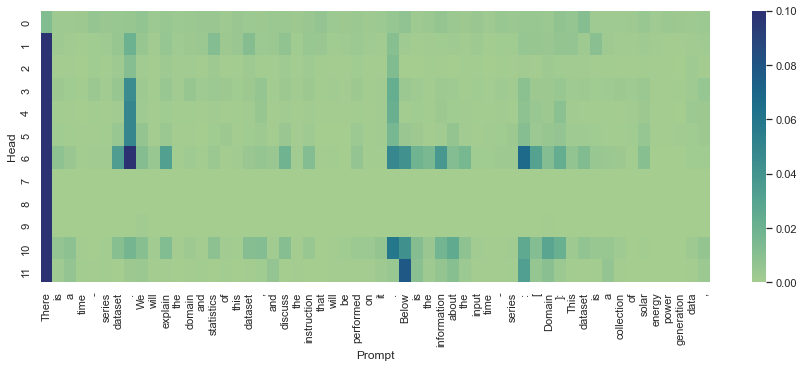

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_norm[:, :56],vmin = 0, vmax = 0.1, xticklabels= tok[:56], cmap='crest',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Head')

# 변경 사항을 적용하여 그래프 표시
plt.show()

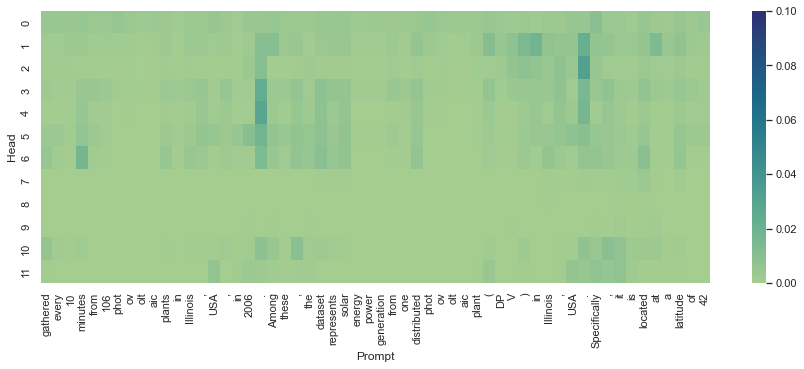

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_norm[:, 56:56*2],vmin = 0, vmax = 0.1, xticklabels= tok[56:56*2], cmap='crest',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Head')

# 변경 사항을 적용하여 그래프 표시
plt.show()

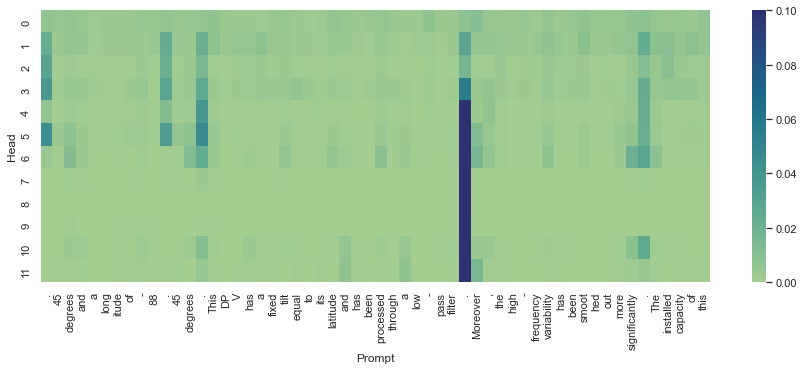

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_norm[:, 56*2:56*3],vmin = 0, vmax = 0.1, xticklabels= tok[56*2:56*3], cmap='crest',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Head')

# 변경 사항을 적용하여 그래프 표시
plt.show()

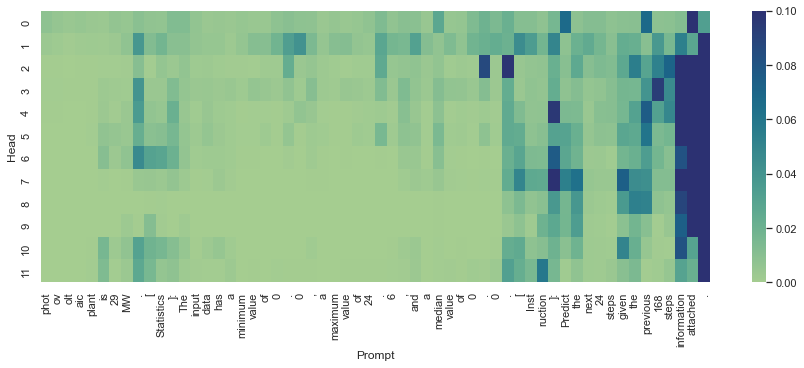

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_norm[:, 56*3:],vmin = 0, vmax = 0.1, xticklabels= tok[56*3:], cmap='crest',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Head')

# 변경 사항을 적용하여 그래프 표시
plt.show()

## 다시

In [76]:
# 평균과 표준편차 계산
mean = avg_attention.mean()
std = avg_attention.std()

# 정규화 수행
avg_attention_stand = (avg_attention - mean) / std
print(avg_attention_stand.shape)
print(avg_attention_stand)
print(len(avg_attention_stand))
print(torch.mean(avg_attention_stand))
print(torch.min(avg_attention_stand))
print(torch.max(avg_attention_stand))

torch.Size([12, 226])
tensor([[ 0.0318, -0.1332, -0.1297,  ...,  0.0234, 16.3172,  0.3714],
        [10.0303, -0.1434, -0.1554,  ...,  0.4978,  0.1802,  6.6733],
        [12.5953, -0.1660, -0.1632,  ...,  1.8939,  3.7843,  3.9124],
        ...,
        [ 9.2953, -0.1717, -0.1724,  ...,  1.2043,  3.5706,  6.7891],
        [ 7.9467, -0.0787, -0.0414,  ...,  1.0431,  0.2771,  2.8311],
        [11.8654, -0.1383, -0.0655,  ...,  0.3372,  0.1897,  4.1511]])
12
tensor(3.5165e-09)
tensor(-0.1731)
tensor(16.4924)


In [77]:
# Min-Max Normalization
tensor = avg_attention
min_val = torch.min(tensor, dim=0).values
max_val = torch.max(tensor, dim=0).values
normalized_tensor = (tensor - min_val) / (max_val - min_val)
avg_attention_stand = normalized_tensor
print(avg_attention_stand.shape)
print(avg_attention_stand)
print(len(avg_attention_stand))
print(torch.mean(avg_attention_stand))
print(torch.min(avg_attention_stand))
print(torch.max(avg_attention_stand))

torch.Size([12, 226])
tensor([[0.0000e+00, 4.2115e-01, 3.2904e-01,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        [7.9584e-01, 3.1244e-01, 1.3388e-01,  ..., 1.3295e-01, 0.0000e+00,
         9.8196e-01],
        [1.0000e+00, 7.2650e-02, 7.4068e-02,  ..., 5.2420e-01, 2.2334e-01,
         5.5176e-01],
        ...,
        [7.3734e-01, 1.1683e-02, 4.3413e-03,  ..., 3.3093e-01, 2.1010e-01,
         1.0000e+00],
        [6.2999e-01, 1.0000e+00, 1.0000e+00,  ..., 2.8576e-01, 6.0021e-03,
         3.8327e-01],
        [9.4191e-01, 3.6629e-01, 8.1679e-01,  ..., 8.7945e-02, 5.8705e-04,
         5.8894e-01]])
12
tensor(0.2960)
tensor(0.)
tensor(1.)


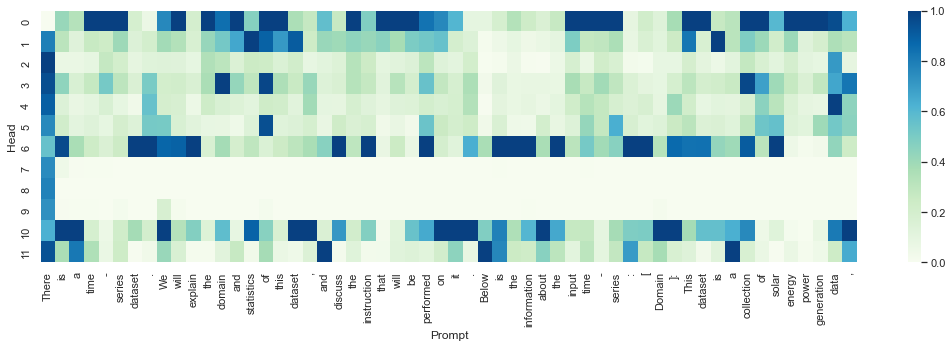

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_stand[:, :56],vmin = 0, vmax = 1, xticklabels= tok[:56], cmap='GnBu',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Head')

plt.tight_layout()

# C:/Users/MILAB/Desktop/IJER 저널 글 작성/attention_visualization
plt.savefig('C:/Users/MILAB/Desktop/IJER 저널 글 작성/attention_visualization/avg_attention_stand_0.png', dpi=2000)

# 변경 사항을 적용하여 그래프 표시
plt.show()


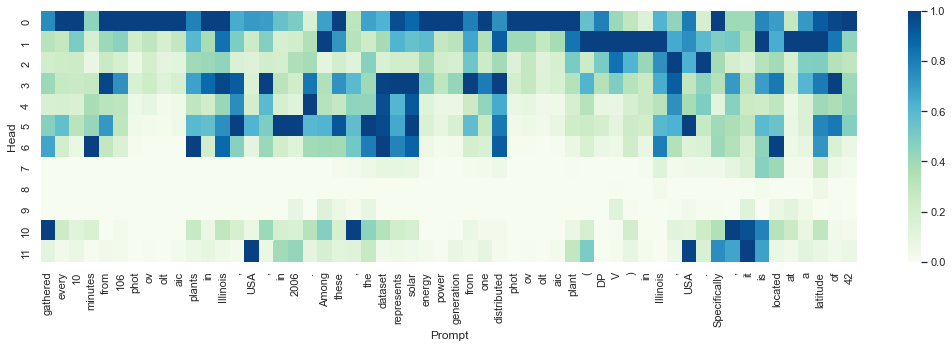

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_stand[:, 56:56*2],vmin = 0, vmax = 1, xticklabels= tok[56:56*2], cmap='GnBu',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Head')

plt.tight_layout()

# C:/Users/MILAB/Desktop/IJER 저널 글 작성/attention_visualization
plt.savefig('C:/Users/MILAB/Desktop/IJER 저널 글 작성/attention_visualization/avg_attention_stand_1.png', dpi=2000)

# 변경 사항을 적용하여 그래프 표시
plt.show()

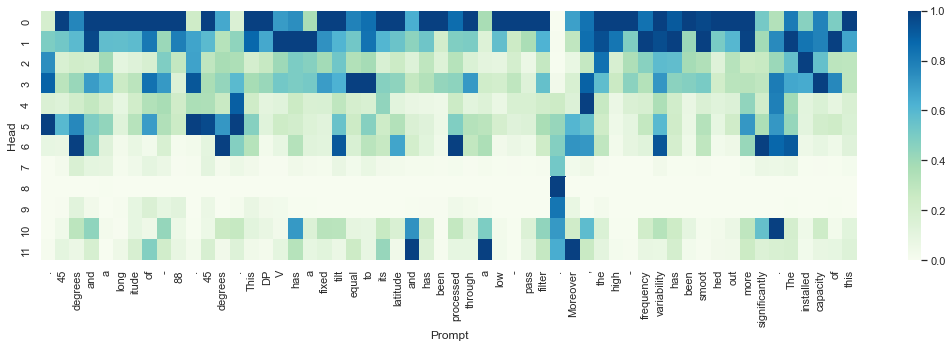

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_stand[:, 56*2:56*3],vmin = 0, vmax = 1, xticklabels= tok[56*2:56*3], cmap='GnBu',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Head')

plt.tight_layout()

# C:/Users/MILAB/Desktop/IJER 저널 글 작성/attention_visualization
plt.savefig('C:/Users/MILAB/Desktop/IJER 저널 글 작성/attention_visualization/avg_attention_stand_2.png', dpi=2000)

# 변경 사항을 적용하여 그래프 표시
plt.show()

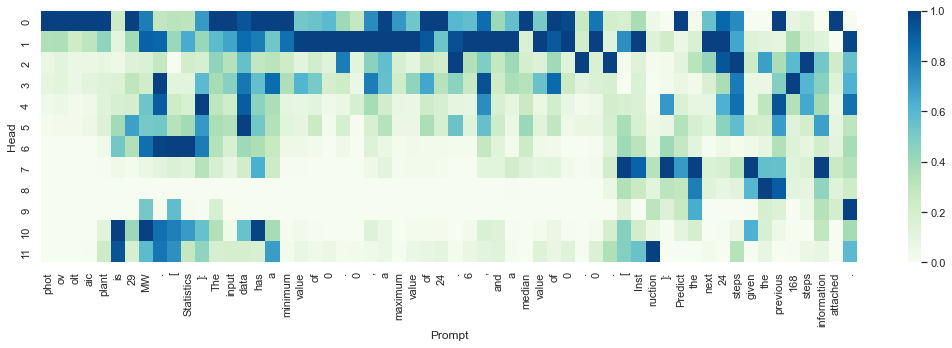

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# avg_attention = attentions_pos.mean(dim = 0)
sns.set(rc={"figure.figsize": (15, 5)})
sns.heatmap(avg_attention_stand[:, 56*3:],vmin = 0, vmax = 1, xticklabels= tok[56*3:], cmap='GnBu',)

# X축에 'A' 이름 추가
plt.xlabel('Prompt')

# Y축에 'B' 이름 추가
plt.ylabel('Head')

plt.tight_layout()

# C:/Users/MILAB/Desktop/IJER 저널 글 작성/attention_visualization
plt.savefig('C:/Users/MILAB/Desktop/IJER 저널 글 작성/attention_visualization/avg_attention_stand_3.png', dpi=2000)

# 변경 사항을 적용하여 그래프 표시
plt.show()